# Ablación de datos

A medida que los sistemas de aprendizaje automático se utilizan en un número cada vez mayor de aplicaciones, desde el análisis de datos sensoriales de satélites y el análisis de la atención de la salud hasta los asistentes virtuales inteligentes y los coches autoconductores, también se están volviendo cada vez más complejos. Esto significa que se necesita más tiempo y recursos de computación para entrenar los modelos y el número de opciones de diseño e hiperparámetros también aumentará. Debido a esta complejidad, suele ser difícil explicar el efecto de cada elección de diseño o componente del sistema de aprendizaje automático sobre su rendimiento. En el contexto del aprendizaje por máquina, podemos definir el estudio de la ablación como "un examen científico de un sistema de aprendizaje por máquina mediante la eliminación de sus componentes básicos para comprender sus efectos sobre su rendimiento general". Las características del conjunto de datos y los componentes del modelo son ejemplos notables de estos bloques de construcción (por lo tanto, utilizamos sus correspondientes términos de ablación de características y ablación de modelos), pero cualquier elección de diseño o módulo del sistema puede incluirse en un estudio de ablación. Sin embargo, los estudios de ablación no forman parte actualmente de la práctica estándar de aprendizaje de máquinas. Una de las razones fundamentales de ello es el hecho de que actualmente la realización de un estudio de ablación requiere importantes modificaciones del código, así como recursos informáticos y de tiempo adicionales. Por otra parte, la experimentación con un sistema de aprendizaje automático es un proceso iterativo que consiste en varios ensayos.

* [Ablation Programming for Machine Learning](http://www.diva-portal.org/smash/record.jsf?aq2=%5B%5B%5D%5D&c=1&af=%5B%5D&searchType=SIMPLE&sortOrder2=title_sort_asc&query=sina%2Bsheikholeslami&language=en&pid=diva2%3A1349978&aq=%5B%5B%5D%5D&sf=all&aqe=%5B%5D&sortOrder=author_sort_asc&onlyFullText=false&noOfRows=50&dswid=-716)
* [In the context of deep learning, what is an ablation study?](https://www.quora.com/In-the-context-of-deep-learning-what-is-an-ablation-study)

## Importacion de modulos y librerias

In [1]:
import os
import numpy as np
import pandas as pd

from utiles import ablation

## Carga de los dataset de DEV, TRAIN y TEST

In [2]:
data_dir = os.path.join('..', 'dataset')

# dataset de mensajes
dev_msg_df = pd.read_csv(os.path.join(data_dir, 'dev_yup_messages_preprocessed.csv'))
train_msg_df = pd.read_csv(os.path.join(data_dir, 'train_yup_messages_preprocessed.csv'))
test_msg_df = pd.read_csv(os.path.join(data_dir, 'test_yup_messages_preprocessed.csv'))

## Casos de ablación

Tomaremos el 20%, 40%, 60%, 80% y el 100% de los turnos iniciando desde el final de la conversación.

In [3]:
tokeep_list = [0.2, 0.4 , 0.6, 0.8, 1.0]

### Estudiantes y tutores

In [4]:
dev_msg_df_list = list()
train_msg_df_list = list()
test_msg_df_list = list()
for tokeep in tokeep_list:
    dev_msg_df_list.append(ablation(df=dev_msg_df, tokeep=tokeep).shape[0])
    train_msg_df_list.append(ablation(df=train_msg_df, tokeep=tokeep).shape[0])
    test_msg_df_list.append(ablation(df=test_msg_df, tokeep=tokeep).shape[0])

### Estudiantes

In [5]:
dev_st_msg_df_list = list()
train_st_msg_df_list = list()
test_st_msg_df_list = list()
for tokeep in tokeep_list:
    dev_st_msg_df_list.append(ablation(df=dev_msg_df[dev_msg_df.sent_from=='student'], tokeep=tokeep).shape[0])
    train_st_msg_df_list.append(ablation(df=train_msg_df[train_msg_df.sent_from=='student'], tokeep=tokeep).shape[0])
    test_st_msg_df_list.append(ablation(df=test_msg_df[test_msg_df.sent_from=='student'], tokeep=tokeep).shape[0])

### Tutores

In [6]:
dev_tu_msg_df_list = list()
train_tu_msg_df_list = list()
test_tu_msg_df_list = list()
for tokeep in tokeep_list:
    dev_tu_msg_df_list.append(ablation(df=dev_msg_df[dev_msg_df.sent_from=='tutor'], tokeep=tokeep).shape[0])
    train_tu_msg_df_list.append(ablation(df=train_msg_df[train_msg_df.sent_from=='tutor'], tokeep=tokeep).shape[0])
    test_tu_msg_df_list.append(ablation(df=test_msg_df[test_msg_df.sent_from=='tutor'], tokeep=tokeep).shape[0])

### Dataset DEV

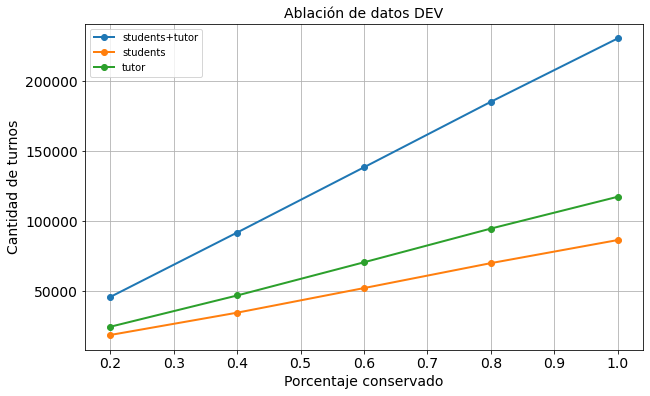

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(tokeep_list, dev_msg_df_list, '-o', label='students+tutor', linewidth=2.0)
plt.plot(tokeep_list, dev_st_msg_df_list, '-o', label='students', linewidth=2.0)
plt.plot(tokeep_list, dev_tu_msg_df_list, '-o', label='tutor', linewidth=2.0)
plt.xlabel('Porcentaje conservado', fontsize=14)
plt.ylabel('Cantidad de turnos', fontsize=14)
plt.title('Ablación de datos DEV', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)

### Dataset TRAIN

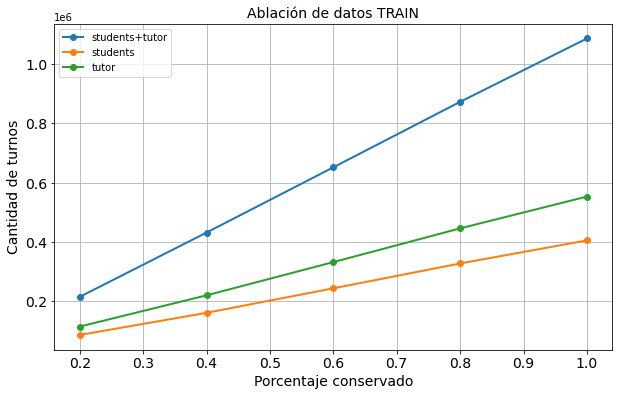

In [19]:
plt.figure(figsize=(10,6))
plt.plot(tokeep_list, train_msg_df_list, '-o', label='students+tutor', linewidth=2.0)
plt.plot(tokeep_list, train_st_msg_df_list, '-o', label='students', linewidth=2.0)
plt.plot(tokeep_list, train_tu_msg_df_list, '-o', label='tutor', linewidth=2.0)
plt.xlabel('Porcentaje conservado', fontsize=14)
plt.ylabel('Cantidad de turnos', fontsize=14)
plt.title('Ablación de datos TRAIN', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)

### Dataset TEST

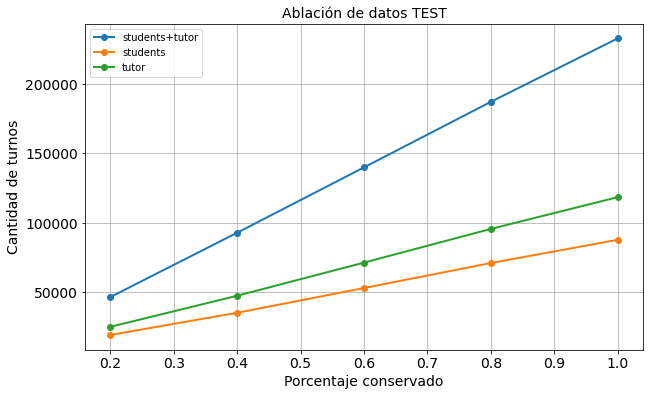

In [20]:
plt.figure(figsize=(10,6))
plt.plot(tokeep_list, test_msg_df_list, '-o', label='students+tutor', linewidth=2.0)
plt.plot(tokeep_list, test_st_msg_df_list, '-o', label='students', linewidth=2.0)
plt.plot(tokeep_list, test_tu_msg_df_list, '-o', label='tutor', linewidth=2.0)
plt.xlabel('Porcentaje conservado', fontsize=14)
plt.ylabel('Cantidad de turnos', fontsize=14)
plt.title('Ablación de datos TEST', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)